In [249]:
query = """
with districts_short as (
    select id, ratio_urban_inhabitants, avg_salary,
           coalesce(unemployment_96, unemployment_95) as unemployment,
           cast(coalesce(crimes_96, crimes_95) as real) / no_inhabitants as crimes from districts
), t as (
    select account_id, amount, balance, k_symbol, type, operation
    from transactions
)
select l.date loan_date, l.amount loan_amount, l.duration loan_duration , l.payments loan_payments,
       a.date account_creation, t.amount, t.balance, t.k_symbol, t.type, t.operation,
       d.ratio_urban_inhabitants, d.avg_salary, d.unemployment, d.crimes, l.status as loan_status, l.id as loan_id
from loans l
    left join accounts a on l.account_id = a.id
    left join t on t.account_id = a.id
    left join districts_short d on a.district_id = d.id
"""

In [250]:
import pandas as pd
import sqlite3
#Random comment
train_dataset = None

with sqlite3.connect("./database_train.db") as db:
    train_dataset = pd.read_sql_query(sql = query, con = db)
    
train_dataset

,loan_date,loan_amount,loan_duration,loan_payments,account_creation,amount,balance,k_symbol,type,operation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,loan_id
0,940105,80952,24,3373,930226,13.5,25049.5,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
1,940105,80952,24,3373,930226,101.0,27845.0,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
2,940105,80952,24,3373,930226,109.5,34394.9,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
3,940105,80952,24,3373,930226,126.8,21788.6,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
4,940105,80952,24,3373,930226,138.3,27855.2,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24489,961227,129408,24,5392,951014,10800.0,33757.6,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24490,961227,129408,24,5392,951014,10800.0,39960.6,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24491,961227,129408,24,5392,951014,11100.0,37530.6,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24492,961227,129408,24,5392,951014,12000.0,39755.1,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308


In [251]:
# Data Cleaning
from functions.clean_data import clean_data

cleaned_interpolated = clean_data(train_dataset)
cleaned_interpolated

c:\Users\ASUS\Documents\FEUP\5Ano\1Semestre\CAC\feup-machine-learning\functions\clean_data.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.k_symbol[index] = None


,loan_date,loan_amount,loan_duration,loan_payments,account_creation,amount,balance,k_symbol,type,operation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,loan_id
0,940105,80952,24,3373,930226,20236.0,21336.0,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
1,940105,80952,24,3373,930226,20236.0,30744.0,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
2,940105,80952,24,3373,930226,20236.0,39961.8,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
3,940105,80952,24,3373,930226,20236.0,40800.4,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
4,940105,80952,24,3373,930226,20236.0,45285.5,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24479,961227,129408,24,5392,951014,10800.0,33757.6,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24480,961227,129408,24,5392,951014,10800.0,39960.6,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24481,961227,129408,24,5392,951014,11100.0,37530.6,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24482,961227,129408,24,5392,951014,12000.0,39755.1,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308


In [252]:
from functions.pre_process import standardize

features_to_standardize = ["loan_date", "loan_amount", "loan_payments", "account_creation", "amount", "balance", "ratio_urban_inhabitants", "avg_salary", "unemployment", "crimes"]
scaled_train_dataset = standardize(cleaned_interpolated, features_to_standardize)
scaled_train_dataset

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.954659,1.560880,2.255295,-1.416673,2.205400,4959
1,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.565310,1.560880,2.255295,-1.416673,2.205400,4959
2,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.183833,1.560880,2.255295,-1.416673,2.205400,4959
3,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.149128,1.560880,2.255295,-1.416673,2.205400,4959
4,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,0.036488,1.560880,2.255295,-1.416673,2.205400,4959
...,...,...,...,...,...,...,...,...,...,...,...
24479,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.440593,-0.273602,-1.073948,1.415530,-0.433647,7308
24480,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.183883,-0.273602,-1.073948,1.415530,-0.433647,7308
24481,1.211803,-0.165369,0.554754,1.373199,0.147967,-0.284448,-0.273602,-1.073948,1.415530,-0.433647,7308
24482,1.211803,-0.165369,0.554754,1.373199,0.220222,-0.192387,-0.273602,-1.073948,1.415530,-0.433647,7308


In [253]:
from functions.pre_process import remove_outliers

no_outliers_train_dataset, no_outliers_cleaned_interpolated = remove_outliers(scaled_train_dataset, cleaned_interpolated)
no_outliers_train_dataset

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.954659,1.560880,2.255295,-1.416673,2.205400,4959
1,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.565310,1.560880,2.255295,-1.416673,2.205400,4959
2,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.183833,1.560880,2.255295,-1.416673,2.205400,4959
3,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.149128,1.560880,2.255295,-1.416673,2.205400,4959
4,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,0.036488,1.560880,2.255295,-1.416673,2.205400,4959
...,...,...,...,...,...,...,...,...,...,...,...
23633,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.440593,-0.273602,-1.073948,1.415530,-0.433647,7308
23634,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.183883,-0.273602,-1.073948,1.415530,-0.433647,7308
23635,1.211803,-0.165369,0.554754,1.373199,0.147967,-0.284448,-0.273602,-1.073948,1.415530,-0.433647,7308
23636,1.211803,-0.165369,0.554754,1.373199,0.220222,-0.192387,-0.273602,-1.073948,1.415530,-0.433647,7308


In [254]:
# Binarization
from functions.pre_process import binarize

features_to_binarize = ["loan_status"]
binarized_train_data_set = binarize(no_outliers_cleaned_interpolated, features_to_binarize)
binarized_train_data_set

,loan_status
0,1
1,1
2,1
3,1
4,1
...,...
23633,1
23634,1
23635,1
23636,1


In [255]:
# One-hot encoder
from functions.pre_process import one_hot_encode

features_to_encode = ["loan_duration", "type", "k_symbol", "operation"]
hot_encoded_train_dataset = one_hot_encode(no_outliers_cleaned_interpolated, features_to_encode)
hot_encoded_train_dataset

,is_loan_duration_12,is_loan_duration_24,is_loan_duration_36,is_loan_duration_48,is_loan_duration_60,is_type_credit,is_type_withdrawal,is_type_withdrawal in cash,is_k_symbol_household,is_k_symbol_insurrance payment,is_k_symbol_interest credited,is_k_symbol_payment for statement,is_k_symbol_sanction interest if negative balance,is_operation_collection from another bank,is_operation_credit card withdrawal,is_operation_credit in cash,is_operation_remittance to another bank,is_operation_withdrawal in cash
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23634,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23635,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [256]:
# Recreate train_dataset after preprocessing

from functions.pre_process import re_create_dataframe

pre_processed_dataframe = re_create_dataframe(no_outliers_train_dataset, hot_encoded_train_dataset, binarized_train_data_set)
pre_processed_dataframe

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,...,is_k_symbol_household,is_k_symbol_insurrance payment,is_k_symbol_interest credited,is_k_symbol_payment for statement,is_k_symbol_sanction interest if negative balance,is_operation_collection from another bank,is_operation_credit card withdrawal,is_operation_credit in cash,is_operation_remittance to another bank,is_operation_withdrawal in cash
0,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.954659,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.565310,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.183833,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.149128,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,0.036488,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.440593,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23634,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.183883,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23635,1.211803,-0.165369,0.554754,1.373199,0.147967,-0.284448,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23636,1.211803,-0.165369,0.554754,1.373199,0.220222,-0.192387,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [257]:
# Transformation
from functions.transform_data import data_transformation_train

processed_df = data_transformation_train(no_outliers_train_dataset, pre_processed_dataframe)
processed_df

,loan_date,loan_amount,loan_payments,account_creation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,is_loan_duration_12,...,household_median,insurrance_payment_median,interest_credited_median,payment_for_statement_median,sanction_interest_if_negative_balance_median,collection_from_another_bank_median,credit_card_withdrawal_median,credit_in_cash_median,remittance_to_another_bank_median,op_withdrawal_in_cash_median
loan_id,,,,,,,,,,,,,,,,,,,,,
4959,-1.230526,-0.609041,-0.358544,-0.918944,1.560880,2.255295,-1.416673,2.205400,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4961,1.119530,-1.073040,-0.743043,1.306269,-0.079714,-0.327103,-0.657717,-0.743820,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4973,1.127971,0.169308,1.243686,0.271122,-0.581835,-0.835769,-0.902989,-0.863412,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,1.197812,-0.540480,1.449506,2.420365,0.830070,-0.167065,1.656175,0.786549,1,1.0,...,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0
5002,-1.181268,-0.390611,2.066515,-0.819708,-1.009384,-0.771904,0.290979,-1.044577,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,1.185786,2.243184,1.074507,0.282700,-0.527149,-0.590077,0.378907,-0.095166,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7284,-2.293163,-0.866916,0.105569,-0.931294,-0.830410,-0.371433,0.050334,-0.288568,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7304,0.032612,2.494246,1.281232,1.319391,1.560880,2.255295,-1.416673,2.205400,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [258]:
pre_processed_features = processed_df.drop("loan_status", axis=1)
pre_processed_labels = processed_df.loan_status

In [259]:
# Feature Selection
from functions.feature_selection import sequencial_feature_selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

classifier = RandomForestClassifier(n_estimators=30, random_state = 19)
best_features = sequencial_feature_selector(pre_processed_features, pre_processed_labels, classifier, 24, "backward")
best_features

Index(['loan_date', 'loan_amount', 'loan_payments', 'avg_salary',
       'unemployment', 'crimes', 'is_loan_duration_12', 'is_loan_duration_24',
       'is_loan_duration_48', 'amount_mean', 'amount_max', 'balance_mean',
       'balance_min', 'credit_median', 'withdrawal_in_cash_median',
       'household_median', 'insurrance_payment_median',
       'payment_for_statement_median',
       'sanction_interest_if_negative_balance_median',
       'collection_from_another_bank_median', 'credit_card_withdrawal_median',
       'credit_in_cash_median', 'remittance_to_another_bank_median',
       'op_withdrawal_in_cash_median'],
      dtype='object')

In [260]:
# Select only best features

pre_processed_features = pre_processed_features[best_features]
pre_processed_features

,loan_date,loan_amount,loan_payments,avg_salary,unemployment,crimes,is_loan_duration_12,is_loan_duration_24,is_loan_duration_48,amount_mean,...,withdrawal_in_cash_median,household_median,insurrance_payment_median,payment_for_statement_median,sanction_interest_if_negative_balance_median,collection_from_another_bank_median,credit_card_withdrawal_median,credit_in_cash_median,remittance_to_another_bank_median,op_withdrawal_in_cash_median
loan_id,,,,,,,,,,,,,,,,,,,,,
4959,-1.230526,-0.609041,-0.358544,2.255295,-1.416673,2.205400,0.0,1.0,0.0,0.038198,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4961,1.119530,-1.073040,-0.743043,-0.327103,-0.657717,-0.743820,1.0,0.0,0.0,-0.273019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4973,1.127971,0.169308,1.243686,-0.835769,-0.902989,-0.863412,0.0,1.0,0.0,0.188694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,1.197812,-0.540480,1.449506,-0.167065,1.656175,0.786549,1.0,0.0,0.0,0.360446,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0
5002,-1.181268,-0.390611,2.066515,-0.771904,0.290979,-1.044577,1.0,0.0,0.0,-0.209895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,1.185786,2.243184,1.074507,-0.590077,0.378907,-0.095166,0.0,0.0,0.0,0.184829,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7284,-2.293163,-0.866916,0.105569,-0.371433,0.050334,-0.288568,1.0,0.0,0.0,-0.444939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7304,0.032612,2.494246,1.281232,2.255295,-1.416673,2.205400,0.0,0.0,0.0,0.821824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [261]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=19, sampling_strategy="auto")
features_res, labels_res = smt.fit_resample(pre_processed_features, pre_processed_labels)

In [262]:
from  sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_res, labels_res, random_state=19, test_size=0.2)

Feature: loan_date, Score: 0.079
Feature: loan_amount, Score: 0.072
Feature: loan_payments, Score: 0.107
Feature: avg_salary, Score: 0.049
Feature: unemployment, Score: 0.049
Feature: crimes, Score: 0.056
Feature: is_loan_duration_12, Score: 0.032
Feature: is_loan_duration_24, Score: 0.028
Feature: is_loan_duration_48, Score: 0.028
Feature: amount_mean, Score: 0.069
Feature: amount_max, Score: 0.065
Feature: balance_mean, Score: 0.095
Feature: balance_min, Score: 0.146
Feature: credit_median, Score: 0.081
Feature: withdrawal_in_cash_median, Score: 0.000
Feature: household_median, Score: 0.000
Feature: insurrance_payment_median, Score: 0.000
Feature: payment_for_statement_median, Score: 0.034
Feature: sanction_interest_if_negative_balance_median, Score: 0.000
Feature: collection_from_another_bank_median, Score: 0.000
Feature: credit_card_withdrawal_median, Score: 0.000
Feature: credit_in_cash_median, Score: 0.007
Feature: remittance_to_another_bank_median, Score: 0.000
Feature: op_withd

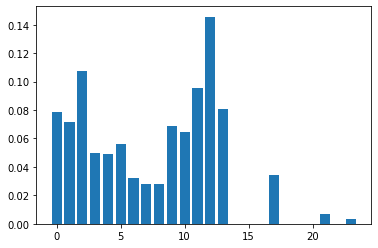

In [263]:
# Feature Importance
from matplotlib import pyplot

classifier.fit(x_train, y_train)
importance = classifier.feature_importances_
for i,v in enumerate(importance):
    	print('Feature: ' + x_train.columns[i] + ', Score: %.3f' % (v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [298]:
# Plots to view learning rate
from functions.overfit_plots import *

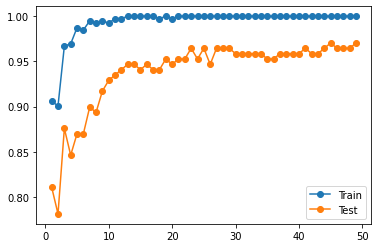

In [299]:
watch_random_forest_overfit(x_train, x_test, y_train, y_test)

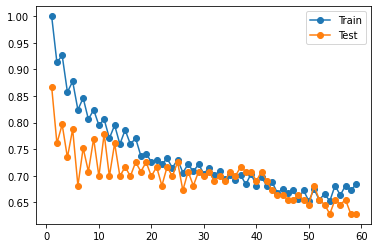

In [305]:
watch_kneighbors_overfit(x_train, x_test, y_train, y_test)

Activation = logistic
Learn Rate = constant
# Layers = 1


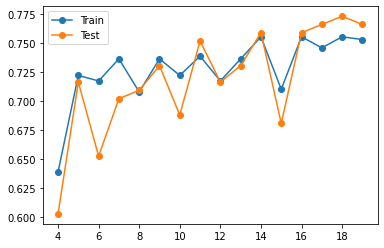

# Layers = 2


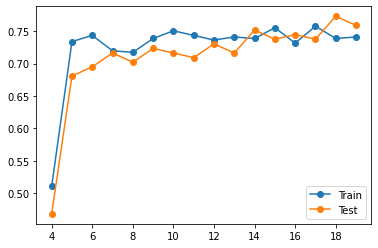

# Layers = 3


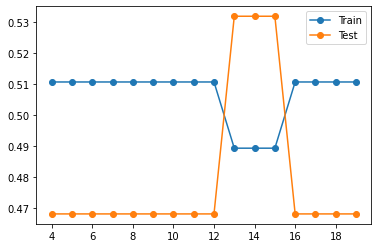

# Layers = 4


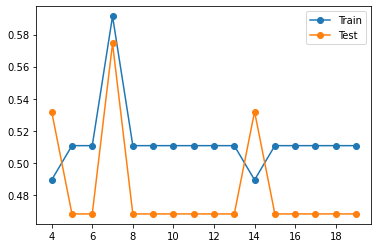

# Layers = 5


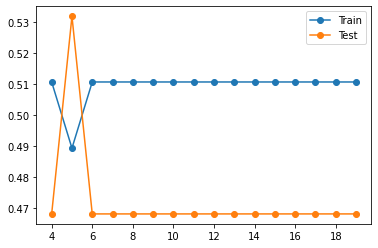

Learn Rate = invscaling
# Layers = 1


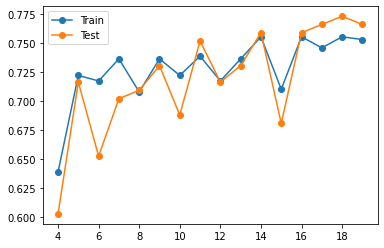

# Layers = 2


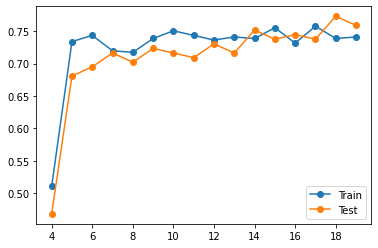

# Layers = 3


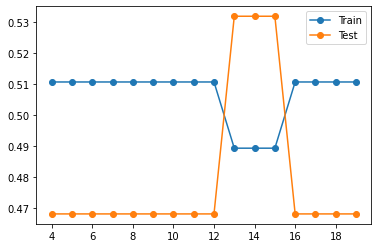

# Layers = 4


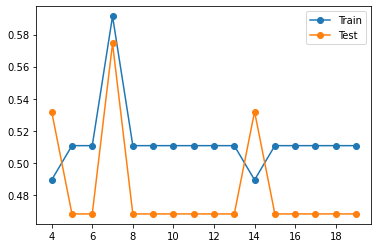

# Layers = 5


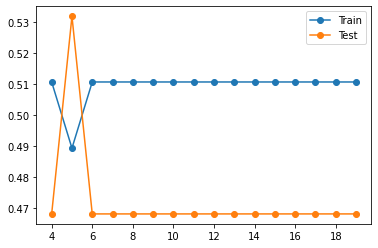

Learn Rate = adaptive
# Layers = 1


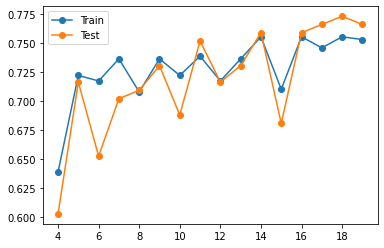

# Layers = 2


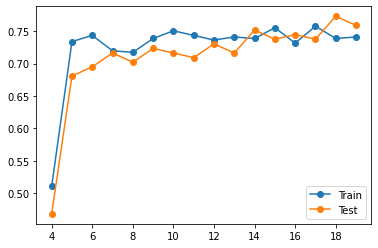

# Layers = 3


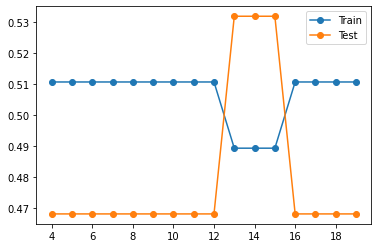

# Layers = 4


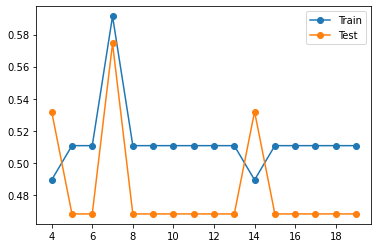

# Layers = 5


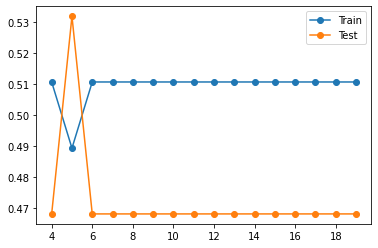

Activation = tanh
Learn Rate = constant
# Layers = 1


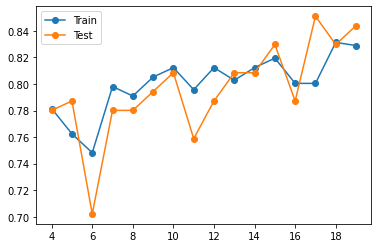

# Layers = 2


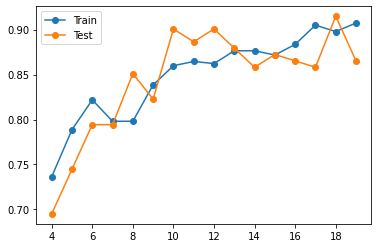

# Layers = 3


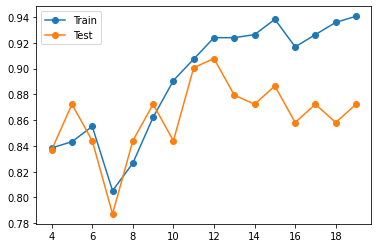

# Layers = 4


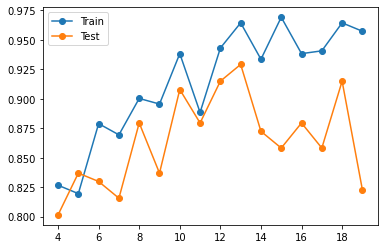

# Layers = 5


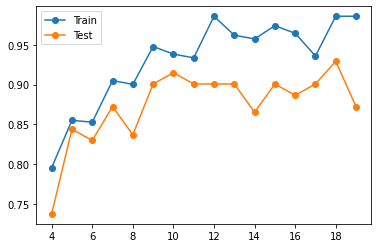

Learn Rate = invscaling
# Layers = 1


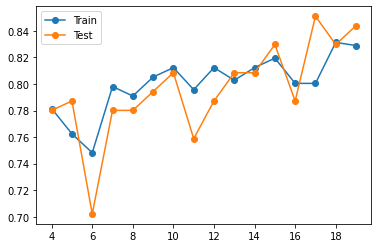

# Layers = 2


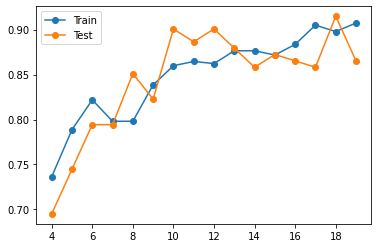

# Layers = 3


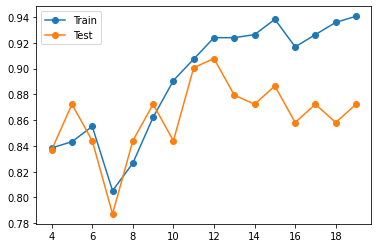

# Layers = 4


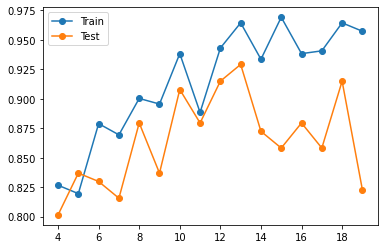

# Layers = 5


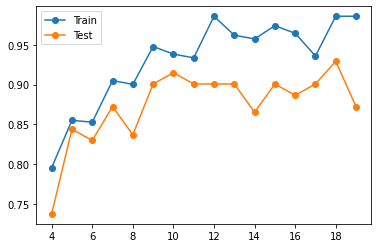

Learn Rate = adaptive
# Layers = 1


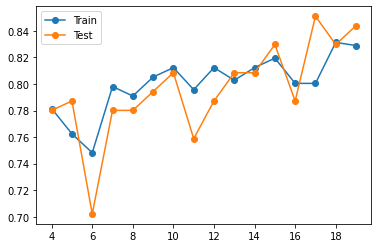

# Layers = 2


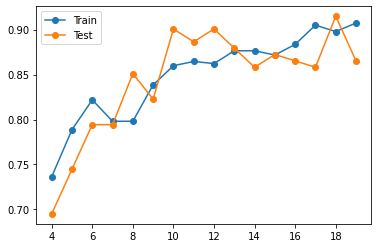

# Layers = 3


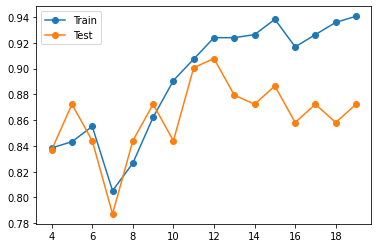

# Layers = 4


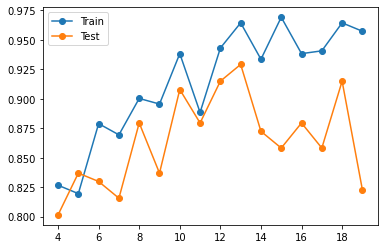

# Layers = 5


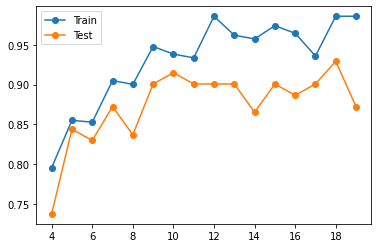

Activation = relu
Learn Rate = constant
# Layers = 1


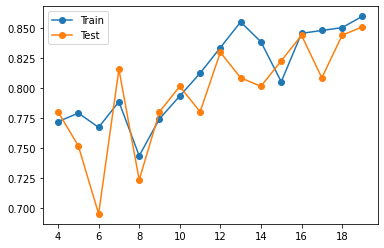

# Layers = 2


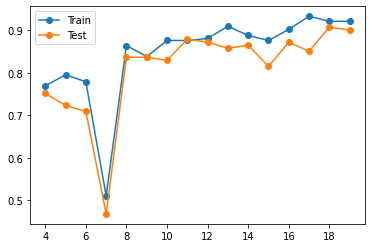

# Layers = 3


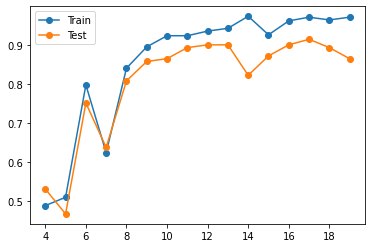

# Layers = 4


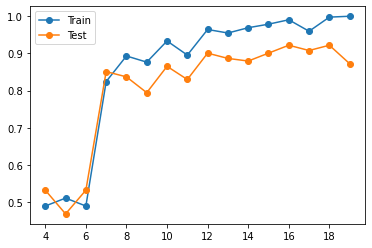

# Layers = 5


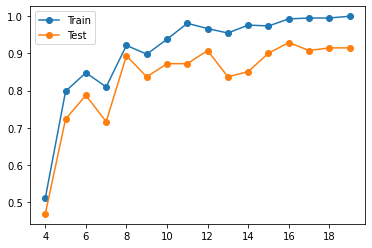

Learn Rate = invscaling
# Layers = 1


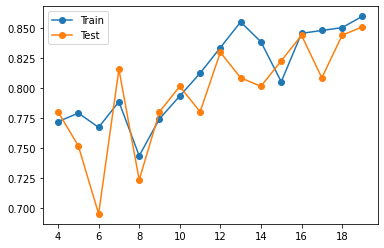

# Layers = 2


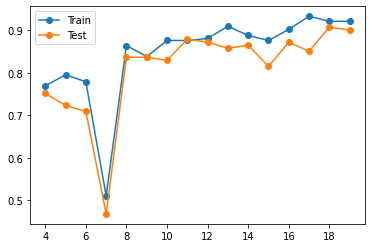

# Layers = 3


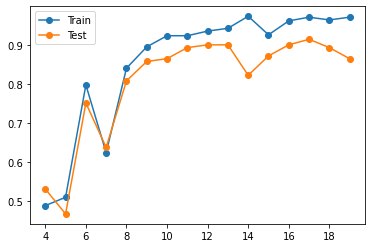

# Layers = 4


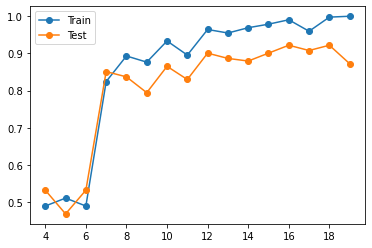

# Layers = 5


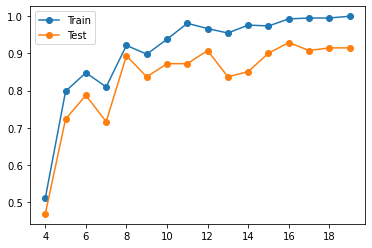

Learn Rate = adaptive
# Layers = 1


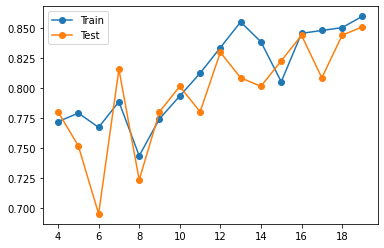

# Layers = 2


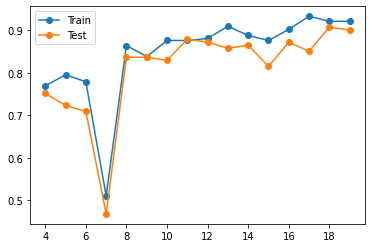

# Layers = 3


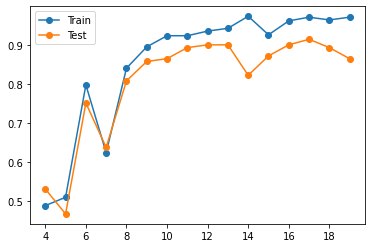

# Layers = 4


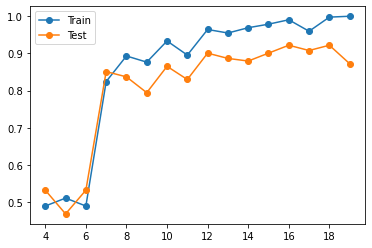

# Layers = 5


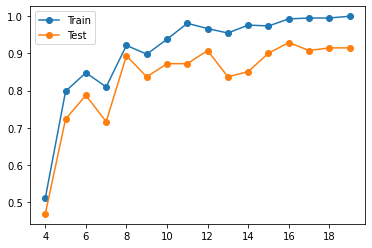

In [16]:
watch_overfit_mlp(x_train, x_test, y_train, y_test)

In [19]:
test_query = """
with districts_short as (
    select id, ratio_urban_inhabitants, avg_salary,
           coalesce(unemployment_96, unemployment_95) as unemployment,
           cast(coalesce(crimes_96, crimes_95) as real) / no_inhabitants as crimes from districts
), t as (
    select account_id, amount, balance, k_symbol, type, operation
    from transactions
)
select l.date loan_date, l.amount loan_amount, l.duration loan_duration , l.payments loan_payments,
       a.date account_creation, t.amount, t.balance, t.k_symbol, t.type, t.operation,
       d.ratio_urban_inhabitants, d.avg_salary, d.unemployment, d.crimes,
       c2.birthday as client_birthday, l.status as loan_status, l.id as loan_id
from loans l
    left join accounts a on l.account_id = a.id
    left join t on t.account_id = a.id
    left join districts_short d on a.district_id = d.id
left join dispositions d2 on a.id = d2.account_id
left join clients c2 on d2.client_id = c2.id
"""

In [20]:
with sqlite3.connect("./database_test.db") as db_test:
    test_dataset = pd.read_sql_query(sql = test_query, con = db_test)

test_dataset

,loan_date,loan_amount,loan_duration,loan_payments,account_creation,amount,balance,k_symbol,type,operation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,client_birthday,loan_status,loan_id
0,971208,30276,12,2523,960728,134.8,26342.3,interest credited,credit,None,57.2,9893,4.72,0.025724,620209,None,4962
1,971208,30276,12,2523,960728,206.0,49784.4,interest credited,credit,None,57.2,9893,4.72,0.025724,620209,None,4962
2,971208,30276,12,2523,960728,214.9,42321.7,interest credited,credit,None,57.2,9893,4.72,0.025724,620209,None,4962
3,971208,30276,12,2523,960728,233.6,71735.7,interest credited,credit,None,57.2,9893,4.72,0.025724,620209,None,4962
4,971208,30276,12,2523,960728,234.7,37097.4,interest credited,credit,None,57.2,9893,4.72,0.025724,620209,None,4962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36384,980718,280440,60,4674,961105,3369.0,65408.6,None,withdrawal in cash,withdrawal in cash,100.0,9897,1.96,0.048239,520909,None,7295
36385,980718,280440,60,4674,961105,4422.0,21292.7,None,withdrawal in cash,withdrawal in cash,100.0,9897,1.96,0.048239,520909,None,7295
36386,980718,280440,60,4674,961105,8383.0,20382.2,None,withdrawal in cash,withdrawal in cash,100.0,9897,1.96,0.048239,520909,None,7295
36387,980718,280440,60,4674,961105,11831.0,28779.8,None,withdrawal in cash,withdrawal in cash,100.0,9897,1.96,0.048239,520909,None,7295


In [21]:
# Standardize
scaled_test_dataset = standardize(test_dataset, features_to_standardize)
scaled_test_dataset

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,-0.896712,-1.025688,-0.775849,-0.198775,-0.707235,-0.752071,-0.517968,0.374496,0.568145,-0.515097,4962
1,-0.896712,-1.025688,-0.775849,-0.198775,-0.701449,0.228501,-0.517968,0.374496,0.568145,-0.515097,4962
2,-0.896712,-1.025688,-0.775849,-0.198775,-0.700726,-0.083660,-0.517968,0.374496,0.568145,-0.515097,4962
3,-0.896712,-1.025688,-0.775849,-0.198775,-0.699206,1.146713,-0.517968,0.374496,0.568145,-0.515097,4962
4,-0.896712,-1.025688,-0.775849,-0.198775,-0.699117,-0.302190,-0.517968,0.374496,0.568145,-0.515097,4962
...,...,...,...,...,...,...,...,...,...,...,...
36384,1.031461,1.042465,0.192608,-0.134573,-0.444406,0.882054,1.682797,0.377585,-0.766181,0.657532,7295
36385,1.031461,1.042465,0.192608,-0.134573,-0.358833,-0.963293,1.682797,0.377585,-0.766181,0.657532,7295
36386,1.031461,1.042465,0.192608,-0.134573,-0.036940,-1.001379,1.682797,0.377585,-0.766181,0.657532,7295
36387,1.031461,1.042465,0.192608,-0.134573,0.243264,-0.650111,1.682797,0.377585,-0.766181,0.657532,7295


In [22]:
# One-hot encode
hot_encoded_test_dataset = one_hot_encode(test_dataset, features_to_encode)

# Recreate
pre_processed_test_dataframe = scaled_test_dataset.join(hot_encoded_test_dataset)
pre_processed_test_dataframe = pre_processed_test_dataframe.drop_duplicates()
pre_processed_test_dataframe = pre_processed_test_dataframe.reset_index()
pre_processed_test_dataframe = pre_processed_test_dataframe.drop(['index'], axis=1)
pre_processed_test_dataframe = pre_processed_test_dataframe.drop(['is_k_symbol_ '], axis=1)
pre_processed_test_dataframe = pre_processed_test_dataframe.drop(['is_k_symbol_None'], axis=1)
pre_processed_test_dataframe = pre_processed_test_dataframe.drop(['is_operation_None'], axis=1)

pre_processed_test_dataframe

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,...,is_k_symbol_household,is_k_symbol_insurrance payment,is_k_symbol_interest credited,is_k_symbol_payment for statement,is_k_symbol_sanction interest if negative balance,is_operation_collection from another bank,is_operation_credit card withdrawal,is_operation_credit in cash,is_operation_remittance to another bank,is_operation_withdrawal in cash
0,-0.896712,-1.025688,-0.775849,-0.198775,-0.707235,-0.752071,-0.517968,0.374496,0.568145,-0.515097,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.896712,-1.025688,-0.775849,-0.198775,-0.701449,0.228501,-0.517968,0.374496,0.568145,-0.515097,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.896712,-1.025688,-0.775849,-0.198775,-0.700726,-0.083660,-0.517968,0.374496,0.568145,-0.515097,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.896712,-1.025688,-0.775849,-0.198775,-0.699206,1.146713,-0.517968,0.374496,0.568145,-0.515097,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.896712,-1.025688,-0.775849,-0.198775,-0.699117,-0.302190,-0.517968,0.374496,0.568145,-0.515097,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30193,1.031461,1.042465,0.192608,-0.134573,-0.444406,0.882054,1.682797,0.377585,-0.766181,0.657532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30194,1.031461,1.042465,0.192608,-0.134573,-0.358833,-0.963293,1.682797,0.377585,-0.766181,0.657532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30195,1.031461,1.042465,0.192608,-0.134573,-0.036940,-1.001379,1.682797,0.377585,-0.766181,0.657532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30196,1.031461,1.042465,0.192608,-0.134573,0.243264,-0.650111,1.682797,0.377585,-0.766181,0.657532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
# Transform
from functions.transform_data import data_transformation_test

processed_test_df = data_transformation_test(pre_processed_test_dataframe)
processed_test_df['loan_id'] = processed_test_df.index
processed_test_df

,loan_date,loan_amount,loan_payments,account_creation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,is_loan_duration_12,is_loan_duration_24,...,insurrance_payment_median,interest_credited_median,payment_for_statement_median,sanction_interest_if_negative_balance_median,collection_from_another_bank_median,credit_card_withdrawal_median,credit_in_cash_median,remittance_to_another_bank_median,op_withdrawal_in_cash_median,loan_id
loan_id,,,,,,,,,,,,,,,,,,,,,
4962,-0.896712,-1.025688,-0.775849,-0.198775,-0.517968,0.374496,0.568145,-0.515097,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4962
4967,1.091476,1.356949,0.478058,1.519545,-0.456264,-0.664697,0.046017,-0.718084,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4967
4968,0.970838,-0.360510,-0.873100,1.517842,-0.749357,-0.776646,0.210391,-0.741910,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4968
4986,-0.977408,-0.425490,1.948078,-0.236752,1.682797,0.976704,0.916230,1.095565,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4986
4988,-0.897118,0.917465,1.406444,-0.269961,-0.733931,-0.890910,0.104032,-0.708258,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,-0.896104,0.011712,1.010236,1.399314,0.896075,-0.542711,1.965319,0.036836,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7279
7286,-1.115077,-0.719438,-1.069853,-1.869072,-0.816203,-0.077931,0.427944,-0.198986,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7286
7292,1.113373,1.348517,0.470404,1.501323,-0.785351,-0.942639,0.921064,-0.771716,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7292


In [24]:
target_features = processed_test_df.drop(['loan_id'], axis=1)
target_features = target_features[best_features]

target_ids = processed_test_df.loan_id

In [25]:
rf = RandomForestClassifier(n_estimators=30, random_state = 19)
rf.fit(x_train, y_train)

probabilities = rf.predict_proba(target_features)
positive_probabilities = [row[0] for row in probabilities]

In [27]:
# Export pred to csv
import csv

file_name = "random_forest_resampled_pp_finalquery_30est_fs24"

with open(f"predictions/v1/{file_name}.csv", "w") as outfile:
        writer = csv.writer(outfile)
        writer.writerow(["Id", "Predicted"])
        writer.writerows(zip(target_ids, positive_probabilities))